平均值 : 
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

標準差 : 
Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64




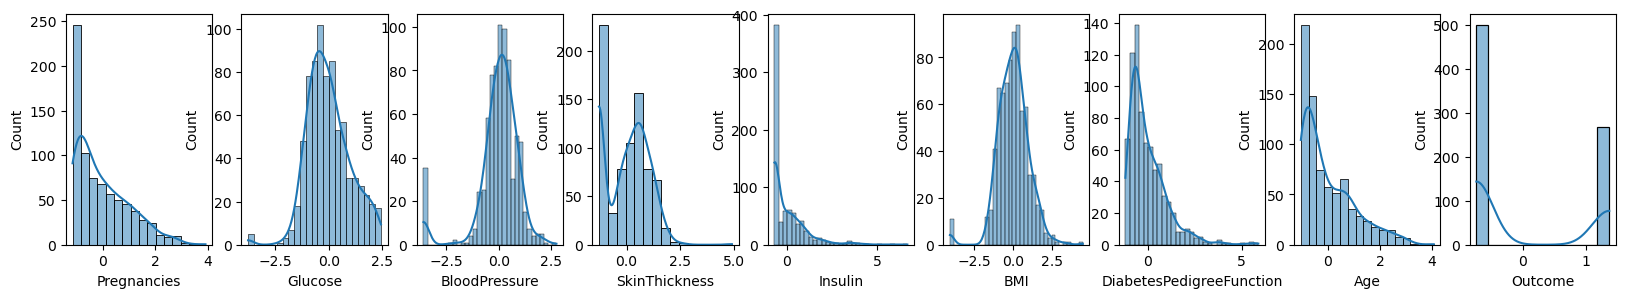

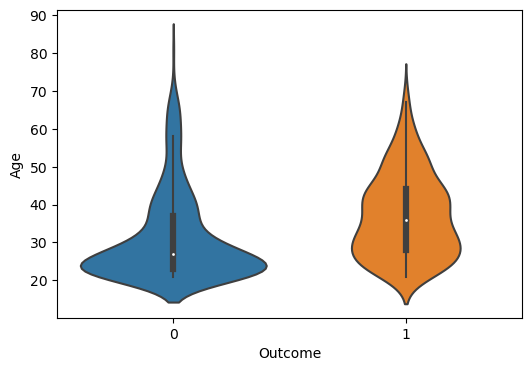

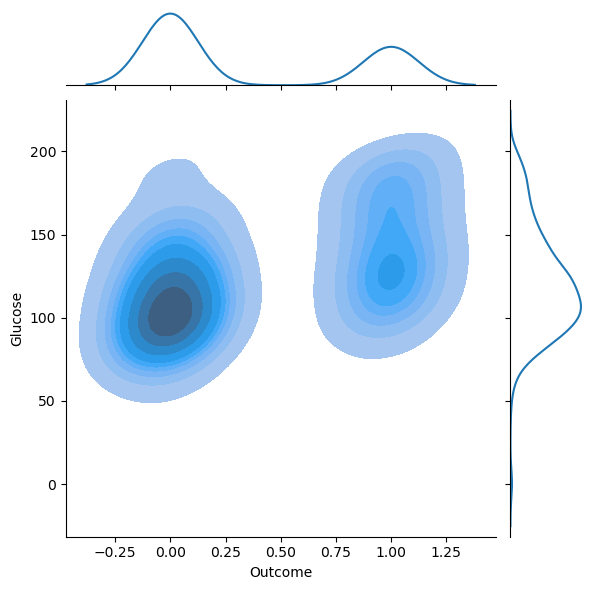

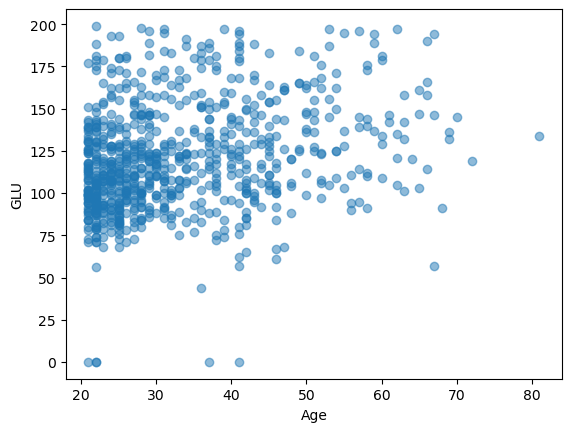

Bias: [55.11365649086597, 61.034963782326784, 53.21322138839348, 43.62976795302768, 45.57069574839075]
Variance: [54.17894718540222, 61.017383627470295, 53.17738834532391, 43.59084646553916, 45.084130016260296]
平均訓練誤差： 86.70524290756944
平均測試誤差： 89.25649348004603


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import linecache

df=pd.read_csv("C:/Users/admin/Downloads/diabetes.csv")
np.set_printoptions(suppress=True)

df.dropna(inplace=True)  #刪除有缺失的資料
df.drop_duplicates(inplace=True)  #刪除重複資料

from sklearn.preprocessing import StandardScaler   #各數據的平均及變異數計算標準化的數值

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

print('平均值 : ')
print(X.mean(axis=0))
print('\n標準差 : ')
print(X.std(axis=0))
print('\n')

#各項數據分布
fig, axes = plt.subplots(nrows=1,ncols=9)  #讓圖在同一行
fig.set_size_inches(20, 3)
sns.histplot(X_scaled[:,0],kde=True ,ax=axes[0])
sns.histplot(X_scaled[:,1],kde=True ,ax=axes[1])
sns.histplot(X_scaled[:,2],kde=True ,ax=axes[2])
sns.histplot(X_scaled[:,3],kde=True ,ax=axes[3])
sns.histplot(X_scaled[:,4],kde=True ,ax=axes[4])
sns.histplot(X_scaled[:,5],kde=True ,ax=axes[5])
sns.histplot(X_scaled[:,6],kde=True ,ax=axes[6])
sns.histplot(X_scaled[:,7],kde=True ,ax=axes[7])
sns.histplot(X_scaled[:,8],kde=True ,ax=axes[8])

axes[0].set(xlabel='Pregnancies')
axes[1].set(xlabel='Glucose')
axes[2].set(xlabel='BloodPressure')
axes[3].set(xlabel='SkinThickness')
axes[4].set(xlabel='Insulin')
axes[5].set(xlabel='BMI')
axes[6].set(xlabel='DiabetesPedigreeFunction')
axes[7].set(xlabel='Age')
axes[8].set(xlabel='Outcome')


fig, axes = plt.subplots(nrows=1,ncols=1)  #年齡與是否有腎臟病的提琴圖
fig.set_size_inches(6, 4)
sns.violinplot(x=df.iloc[:,8],y=df.iloc[:,7])

sns.jointplot(x=df.iloc[:,8], y=df.iloc[:,1], kind="kde",shade=True)  #隨機血糖與是否有腎臟病的二維分布圖

fig, axes = plt.subplots(nrows=1,ncols=1)  #年齡與隨機血糖的散布圖
plt.scatter(df.iloc[:,7], df.iloc[:,1], alpha=0.5)
plt.xlabel('Age') 
plt.ylabel('GLU')
plt.show()


#使用K-Fold
clear_data=df.drop(['Outcome'],axis=1)
label=df['Outcome']
clear_data.head()

x_features=clear_data.iloc[:,:-1]
y_label=clear_data.iloc[:,-1]

from sklearn.model_selection import KFold
kf=KFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.linear_model import LinearRegression
model=LinearRegression()

test_bias=[]
test_variance=[]
train_errors=[]
test_errors=[]

for train_index, test_index in kf.split(x_features):
    X_train, y_train = x_features.iloc[train_index], y_label[train_index]
    X_test, y_test = x_features.iloc[test_index], y_label[test_index]
    model.fit(X_train, y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    bias=np.sum((y_test_pred - np.mean(y_test))**2)/len(y_test_pred)
    variance=np.sum((y_test_pred - np.mean(y_test_pred))**2)/len(y_test_pred)
    test_bias.append(bias)
    test_variance.append(variance)
    
    train_error=np.sum((y_train_pred - y_train)**2)/len(y_train_pred)
    test_error=np.sum((y_test_pred - y_test)**2)/len(y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
print("Bias:",test_bias)
print("Variance:",test_variance)

print("平均訓練誤差：",sum(train_errors)/len(train_errors))
print("平均測試誤差：",sum(test_errors)/len(test_errors))

In [ ]:
#結果還不錯，Bias與Variance的結果相當，訓練與測試的平均誤差也很接近，沒有出現Underfitting，沒有出現Underfitting或Overfitting的情況